In [3]:
import pandas as pd
import tensorflow as tf
import time

In [4]:
data=pd.read_csv("IMDB Dataset.csv")
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [7]:
print(data.columns)

Index(['review', 'sentiment'], dtype='object')


In [9]:
texts = data['review'].values
labels = data['sentiment'].map({'positive': 1, 'negative': 0}).values


In [19]:
dataset = dataset.shuffle(buffer_size=len(texts), seed=42)
train_size = int(0.8 * len(texts))
train_ds = dataset.take(train_size)
test_ds = dataset.skip(train_size)


In [33]:
def preprocess(text, label):
    text = vectorize_layer(text) 
    return text, label

In [35]:
train_ds_no_opt = train_ds.map(preprocess).batch(32)

train_ds_opt = (
    train_ds
    .map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
    .cache()
    .prefetch(tf.data.AUTOTUNE)
    .batch(32)
)


In [37]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=10000, output_dim=64, input_length=250),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

C:\Users\lenovo\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [39]:
start_time_no_opt = time.time()
model.fit(train_ds_no_opt, epochs=3)
end_time_no_opt = time.time()


Epoch 1/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 105s 79ms/step - accuracy: 0.7011 - loss: 0.5525
Epoch 2/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 119s 61ms/step - accuracy: 0.7085 - loss: 0.5634
Epoch 3/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 71s 57ms/step - accuracy: 0.8614 - loss: 0.3288


In [41]:
start_time_opt = time.time()
model.fit(train_ds_opt, epochs=3)
end_time_opt = time.time()

Epoch 1/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 65s 52ms/step - accuracy: 0.8826 - loss: 0.2771
Epoch 2/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 70s 56ms/step - accuracy: 0.9225 - loss: 0.2041
Epoch 3/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 70s 56ms/step - accuracy: 0.9418 - loss: 0.1649


In [43]:
no_opt_time = end_time_no_opt - start_time_no_opt
opt_time = end_time_opt - start_time_opt

print("\nTraining time WITHOUT optimization: {:.2f} seconds".format(no_opt_time))
print("Training time WITH optimization: {:.2f} seconds".format(opt_time))


Training time WITHOUT optimization: 295.13 seconds
Training time WITH optimization: 204.41 seconds


In [45]:
time_comparison = pd.DataFrame({
    "Experiment": ["Without Optimized Pipeline", "With Optimized Pipeline"],
    "Training Time (seconds)": [no_opt_time, opt_time]
})

print("Training Time Comparison Table:\n")
print(time_comparison)

Training Time Comparison Table:

                   Experiment  Training Time (seconds)
0  Without Optimized Pipeline               295.132099
1     With Optimized Pipeline               204.410146


In [65]:
!pip install graphviz


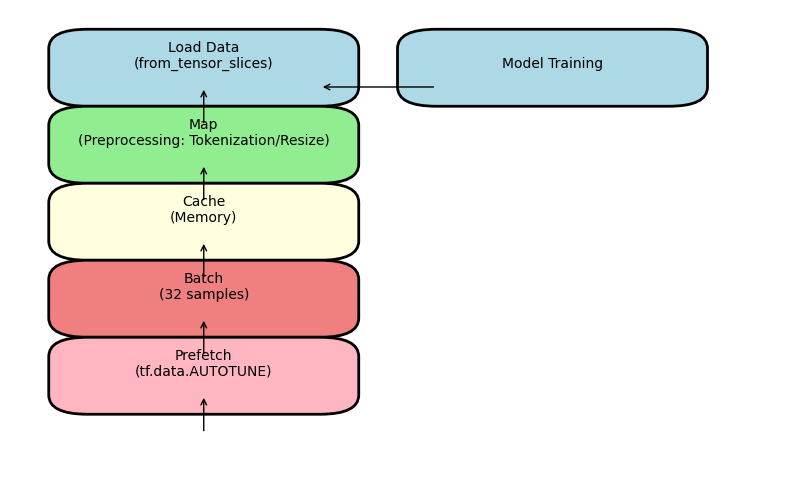

In [71]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(10, 6))

ax.add_patch(patches.FancyBboxPatch((0.1, 0.8), 0.3, 0.1, boxstyle="round,pad=0.05", facecolor='lightblue', edgecolor='black', linewidth=2))
ax.text(0.25, 0.85, 'Load Data\n(from_tensor_slices)', fontsize=10, ha='center')

ax.add_patch(patches.FancyBboxPatch((0.1, 0.6), 0.3, 0.1, boxstyle="round,pad=0.05", facecolor='lightgreen', edgecolor='black', linewidth=2))
ax.text(0.25, 0.65, 'Map\n(Preprocessing: Tokenization/Resize)', fontsize=10, ha='center')

ax.add_patch(patches.FancyBboxPatch((0.1, 0.4), 0.3, 0.1, boxstyle="round,pad=0.05", facecolor='lightyellow', edgecolor='black', linewidth=2))
ax.text(0.25, 0.45, 'Cache\n(Memory)', fontsize=10, ha='center')

ax.add_patch(patches.FancyBboxPatch((0.1, 0.2), 0.3, 0.1, boxstyle="round,pad=0.05", facecolor='lightcoral', edgecolor='black', linewidth=2))
ax.text(0.25, 0.25, 'Batch\n(32 samples)', fontsize=10, ha='center')

ax.add_patch(patches.FancyBboxPatch((0.1, 0.0), 0.3, 0.1, boxstyle="round,pad=0.05", facecolor='lightpink', edgecolor='black', linewidth=2))
ax.text(0.25, 0.05, 'Prefetch\n(tf.data.AUTOTUNE)', fontsize=10, ha='center')

ax.add_patch(patches.FancyBboxPatch((0.55, 0.8), 0.3, 0.1, boxstyle="round,pad=0.05", facecolor='lightblue', edgecolor='black', linewidth=2))
ax.text(0.7, 0.85, 'Model Training', fontsize=10, ha='center')

ax.annotate('', xy=(0.25, 0.8), xytext=(0.25, 0.7), arrowprops=dict(facecolor='black', arrowstyle='->'))
ax.annotate('', xy=(0.25, 0.6), xytext=(0.25, 0.5), arrowprops=dict(facecolor='black', arrowstyle='->'))
ax.annotate('', xy=(0.25, 0.4), xytext=(0.25, 0.3), arrowprops=dict(facecolor='black', arrowstyle='->'))
ax.annotate('', xy=(0.25, 0.2), xytext=(0.25, 0.1), arrowprops=dict(facecolor='black', arrowstyle='->'))
ax.annotate('', xy=(0.25, 0.0), xytext=(0.25, -0.1), arrowprops=dict(facecolor='black', arrowstyle='->'))
ax.annotate('', xy=(0.4, 0.8), xytext=(0.55, 0.8), arrowprops=dict(facecolor='black', arrowstyle='->'))

ax.set_xlim(0, 1)
ax.set_ylim(-0.2, 1)
ax.axis('off')

plt.show()